In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
import time

In [3]:
from rxrmask.core import (
    Atom,
    Structure,
    FormFactorLocalDB,
    ParametersContainer,
    create_compound,
)
from rxrmask.utils import (
    plot_reflectivity,
    plot_energy_scan,
    plot_density_profile,
    get_density_profile_from_element_data,
)
from rxrmask.backends import (
    PRReflectivityBackend,
    PRParallelReflectivityBackend,
)

In [4]:
o_ff = FormFactorLocalDB(element="O", is_magnetic=False)
sr_ff = FormFactorLocalDB(element="Sr", is_magnetic=False)
ti_ff = FormFactorLocalDB(element="Ti", is_magnetic=False)
o_atom = Atom(
    Z=8,
    name="O",
    ff=o_ff,
)
sr_atom = Atom(
    Z=38,
    name="Sr",
    ff=sr_ff,
)
ti_atom = Atom(
    Z=22,
    name="Ti",
    ff=ti_ff,
)

In [15]:
parameters_container = ParametersContainer()
crystal = create_compound(
    parameters_container=parameters_container,
    name="SrTiO3-crystal",
    formula="Sr:1,Ti:1,O:3",
    thickness=50.0,
    density=5.12,
    atoms=[sr_atom, ti_atom, o_atom],
    roughness=1.2,
    prev_roughness=0.0,
    linked_prev_roughness=False,
)
film = create_compound(
    parameters_container=parameters_container,
    name="SrTiO3-film",
    formula="Sr:1,Ti:1,O:3",
    thickness=23.0,
    density=5.52,
    atoms=[sr_atom, ti_atom, o_atom],
    roughness=4.0,
    prev_roughness=0.0,
    linked_prev_roughness=True,
)

struc = Structure(name="SrTiO3-struc", n_compounds=2, params_container=parameters_container)
struc.add_compound(0, crystal)
struc.add_compound(1, film)
struc.validate_compounds()
struc.create_layers(step=0.1)

In [16]:
init_params = parameters_container.get_fit_vector()
print(f"Initial parameters: {init_params}")
for param in parameters_container.parameters:
    if param.fit:
        print(f"{param.name}: {param.value}")

Initial parameters: []


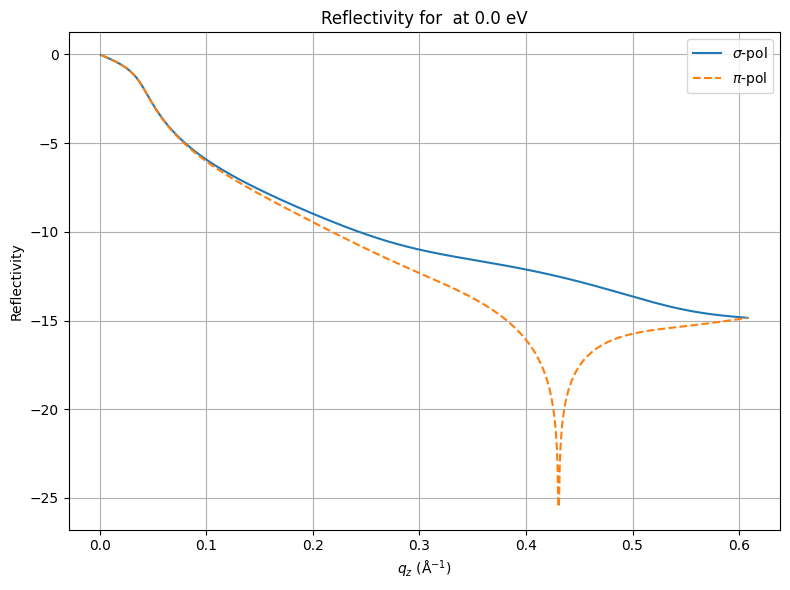

In [20]:
backend = PRReflectivityBackend()

E_eV = 600
Theta = np.linspace(0.1, 89.1, num=1001)
qz = np.sin(Theta * np.pi / 180) * (E_eV * 0.001013546143)

initial_ref = backend.compute_reflectivity(structure=struc, qz=qz, energy=E_eV)
plot_reflectivity(initial_ref.qz, np.log(initial_ref.R_s), np.log(initial_ref.R_p), initial_ref.energy, "")
